In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show


##  Investigating Normal Moveout (NMO) corrections




We are going to run through some exercises together in the lecture to give you a better idea of how Normal Moveout corrections are done in Common Mid-point (CMP) gathers. This is a critical step in seismic data processing.

Firstly, we are going to do an exercise on paper. You are provided with an example of a typical CMP gather (Records 7).  This CMP gather comes from a land survey in which the source was dynamite. This gather contains 96 traces with a 25 m trace spacing.**

**I HAVE SENT YOU AN UPDATED VERSION OF THIS FIG TO INCLUDE INSTEAD**
![NMO](../data/NMO.png)


**1) Calculate the NMO velocities of reflections A and B from  CMP gather SHOWN ABOVE**

The equation you need is: 

$$t ^{2} = t_0 ^{2} + x ^{2}/V_{NMO} ^{2}$$

You can make these measurements yourself from the figure, but to help you out for reflection A:
- at x = 0, to = 0.66s
- Note that there are 86 traces in the CMP, but the x_0 position is offset from the centre!
- in the far left t_x = 1.0s
- between x=0 and the far left (where we measure t_x) there are 70 traces x 25 m spacing = 1750 m t_x = 1.0s

<details>
    <summary>💡 Answer</summary>

$$t ^{2} = t_0 ^{2} + x ^{2} / V_{NMO} ^{2}$$

$$1 ^{2} = 0.66 ^{2} + 1750 / V_{NMO} ^{2}$$

$$V_{RMS} = 2330 m/s$$


for reflection B:
- at x = 0, to = 2.0s
- Note that there are 86 traces in the CMP, but the x_0 position is offset from the centre!
- in the far left t_x = 2.21s
- between x=0 and the far left there are 70 traces x 25 m spacing = 1750 m


<details>
    <summary>💡 Answer</summary>


$$t ^{2} = t_0 ^{2} + x ^{2} / V_{NMO} ^{2}$$

$$2.21 ^{2} = 2.0 ^{2} + 1750 / V_{NMO} ^{2}$$

$$V_{RMS} = 2488 m/s$$

In order to correct for NMO we MUST know the NMO velocity. This is the velocity which produces a hypoerbola that fits the reflection on a CMP gather. There will be a different NMO velocity for every reflection, and there could be hundreds of reflections in a CMP gather!! In reality, we don't do this manually, we use software. In the next part of this example we will explore how to determine 

### 2) Simulate a reflection and NMO correct it using code

In this part of the "demonstration" we will produce our own reflection using code and then NMO correct it. In this case we actually know what the velocity for the NMO correction is and in the practical you will explore how we go about finding the correct velocity to use when we don't know apriori!

In this example there is a single shallow reflection at t_0 = 0.8 s in a unit with average velocity of v = 2264 m/s. The offset (distance between source and receivers) range is 0 to 3150 m, with a 50-m trace separation in the CMP gather. The wavelet is assumed to be a 20-Hz Ricker wavelet.

In [2]:
def Ricker(f0,t): # Ricker wavelet
    return (1-2*(pi*f0*t)**2)*np.exp(-(pi*f0*t)**2)

def tr(x): # Traveltime from source to receiver (in s)
    return np.sqrt(t0**2+x**2/v**2) # Normal moveout with constant velocity

def w(x,t): # Wavefield
    return Ricker(f0,t-tr(x)) # Ricker wavelet from a single reflector at t=tr

def w_NMO(x,t0):
    tx=np.sqrt(t0**2+x**2/v**2)
    return w(x,tx)


In [3]:
f0=20
t0=0.8
v=2264

Xmax=3150. # Max offset
dX=5. # Trace spacing 
Tmax=2. # Max time 
dT=0.001 # Sampling period

t=np.arange(0,Tmax,dT) # Coordinate vector for time
x=np.arange(0,Xmax,dX) # Coordinate vector for offset

(X,T)=np.meshgrid(x,t) # Coordinate matrices for time and offset


In [4]:
W=w(X,T) # Wavefield
w_NMO=w_NMO(X,T) # NMO-corrected wavefield


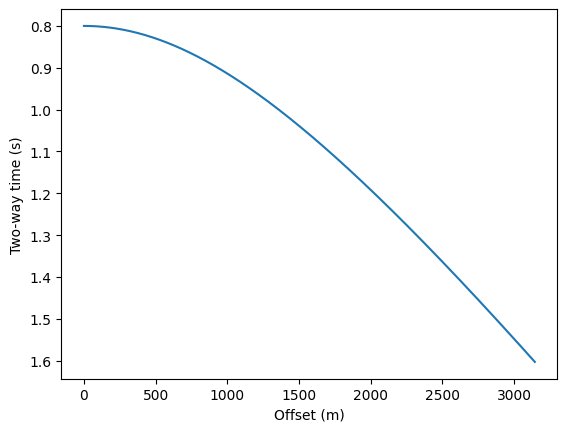

In [5]:
# Travel time as function of offset
plt.figure()
plt.plot(x,tr(x))
plt.xlabel('Offset (m)')
plt.ylabel('Two-way time (s)')
plt.gca().invert_yaxis()


Text(0, 0.5, 'Two-way time (s)')

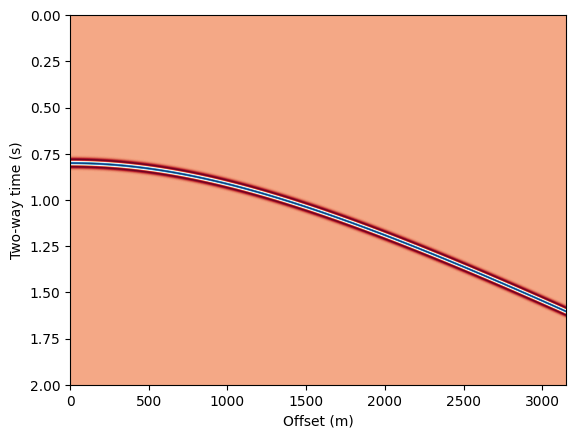

In [6]:
# Wavefield
plt.figure()
im = imshow(W,cmap=cm.RdBu,aspect='auto',extent=[0,Xmax,Tmax,0])
plt.xlabel('Offset (m)')
plt.ylabel('Two-way time (s)')


Text(0, 0.5, 'Two-way time (s)')

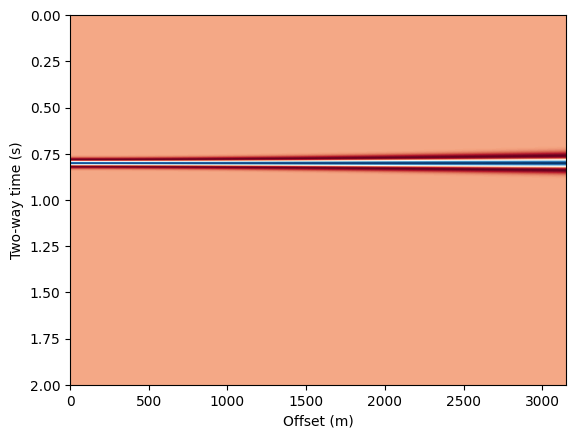

In [7]:
# NMO-corrected wavefield
plt.figure()
im = imshow(w_NMO,cmap=cm.RdBu,aspect='auto',extent=[0,Xmax,Tmax,0])
plt.xlabel('Offset (m)')
plt.ylabel('Two-way time (s)')


As seen from the figure above, in the NMO-corrected common midpoint (CMP) gather, the reflector appears to 'stretch' with increasing offset. This is a known issue in seismic data processing (NMO stretch)


### Question- what happens if you run the NMO correction with a velocity that is too low (e.g. 2000 km/s) or a velocity that is too high (e.g. 3000 km/s)?